# Part II - (Communicate Data findings)
## by (Oluwafemi OLUWASINA)

## Investigation Overview

>We investigated the relationship between Age of the riders, Gender, Trip Duration of the riders, Distance covered by the riders, Speed attained by the riders etc. 

>The male gender of the Subscriber user type and Age around 33years is seen to cover the highest distance of more than 15,000 metres, while for the Customer User typeThe Male gender was also with the highest distance covered of above 15000metres also about 33 years of age. The three genders dominated the ages range and at most speed, The Male gender dominated speed between 5.8m/s and 8m/s but a Female has a highest speed of 10m/s at about 33years of age which is the highest of all.
It was noticed that the riders with age 50 years tarried most in the ride recorded as the other gender while the male and female came second and third respectively.


## Dataset Overview

>The datasets I chose for this project are 5 in number which includes the ford Go Bike System Data from San Francisco Bay Area, The Divvy Trips from Chicago, Illinois, The Citibike Trip data from New York City, The Capital Bike Share trip data from washington Dc Metro Area and the Cogo trip data from Columbus,Ohio.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('master_bike_data.csv')
df.head()

,Unnamed: 0,trip_id,start_time,end_time,bike_id,trip_duration,start_station_id,start_station_name,end_station_id,end_station_name,...,gender,location,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,distance,speed,birth_yr,age
0,96186,359178.0,2019-02-01 06:44:11.000,2019-02-01 06:50:01.000,250,350.0,15.0,Grant Ave & Main St,9.0,Columbus Commons - Rich St,...,Male,"Columbus,Ohio",39.957493,-82.990057,39.957591,-82.998002,678.961407,1.940,1970-01-01 00:00:00.000001965,54.0
1,96187,359179.0,2019-02-01 08:46:07.000,2019-02-01 08:56:08.000,556,601.0,55.0,Michigan Ave & 3rd Ave,53.0,Neil Ave & 11th Ave,...,Male,"Columbus,Ohio",39.984053,-83.016920,39.995430,-83.014548,1279.379806,2.129,1970-01-01 00:00:00.000001966,53.0
2,96188,359180.0,2019-02-01 09:46:32.000,2019-02-01 10:13:25.000,108,1613.0,62.0,Market District & 3rd Ave,82.0,Front St & Town St,...,Male,"Columbus,Ohio",39.985821,-83.027200,39.958920,-83.001883,3687.735074,2.286,1970-01-01 00:00:00.000001972,47.0
3,96190,359182.0,2019-02-01 15:33:06.000,2019-02-01 15:37:03.000,296,237.0,82.0,Front St & Town St,9.0,Columbus Commons - Rich St,...,Male,"Columbus,Ohio",39.958920,-83.001883,39.957591,-82.998002,362.965312,1.531,1970-01-01 00:00:00.000001965,54.0
4,96191,359183.0,2019-02-01 15:37:12.000,2019-02-01 15:42:07.000,250,295.0,9.0,Columbus Commons - Rich St,15.0,Grant Ave & Main St,...,Male,"Columbus,Ohio",39.957591,-82.998002,39.957493,-82.990057,678.961407,2.302,1970-01-01 00:00:00.000001965,54.0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)


>The Subslide shows the relationship between The distance covered by the riders and Age of the riders with respect to each gender and respective user type. The male gender of the Subscriber user type and Age around 33years is seen to cover the highest distance of more than 15,000 metres, while for the Customer User typeThe Male gender was also with the highest distance covered of above 15000metres also about 33 years of age.


''

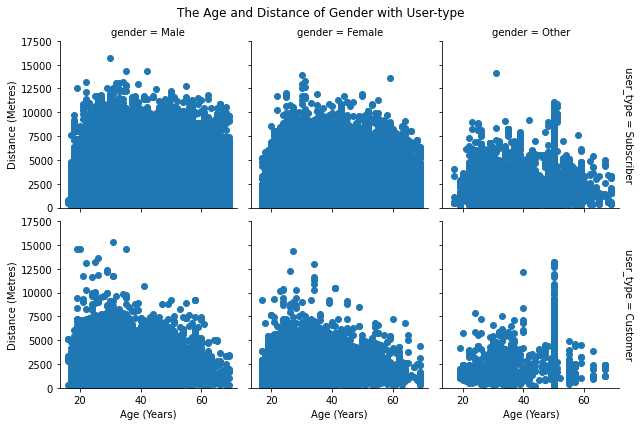

In [3]:
#a facetgrisd plot of gender on the column and user type on the row
g=sb.FacetGrid(data=df, col='gender', row='user_type', margin_titles=True)
# each facetgrid to carry a scatter plot of age against distance covered
g.map(plt.scatter,'age', 'distance')
#axis labels
g.axes[1,0].set_xlabel('Age (Years)')
g.axes[1,1].set_xlabel('Age (Years)')
g.axes[1,2].set_xlabel('Age (Years)')
g.axes[0,0].set_ylabel('Distance (Metres)')
g.axes[1,0].set_ylabel('Distance (Metres)')
g.fig.subplots_adjust(top=0.9)
#title of the figure
g.fig.suptitle('The Age and Distance of Gender with User-type')
plt.ylim(0,17500)
;


### (Visualization 2)

> Riders of other gender are seen to be less dominant in the teenagers and riders in their 60s as seen in the rest of the Age category. The Male and Female genders are seen to be most dominant in all, while the male gender is seen to have attained the highest speed of 8m/s.

''

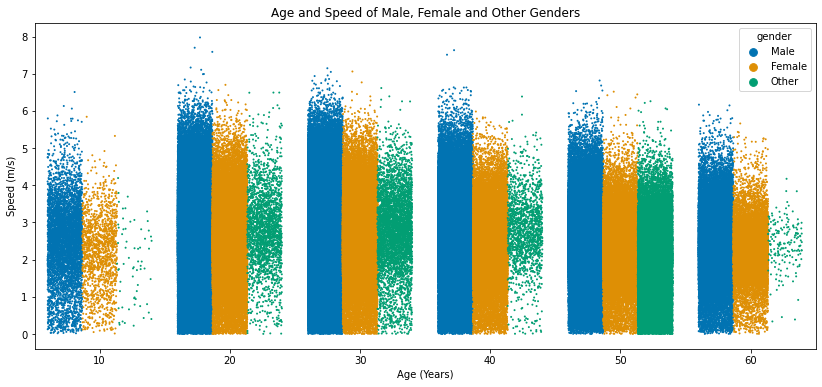

In [13]:
#some age values contains Nan
#we drop them
df_s=df.dropna(subset=['age']).copy()
# we then create age category 
df_s['age_category']=((df_s.age//10)*10).astype(int)
#figure size
plt.figure(figsize=[14,6])
# plot of speed less than 10m/s against age with their respective genders
sb.stripplot(data=df_s.query('speed<10'), x='age_category', y='speed', hue='gender', size=2, palette='colorblind', jitter=0.4, dodge=True)
plt.xlabel('Age (Years)')
plt.ylabel('Speed (m/s)')
plt.title('Age and Speed of Male, Female and Other Genders')
;

## (Visualization 3)

This sublide shows the relationship between Age of the riders and trip duration with respect to the genders. it was noticed that the riders with ag 50 years tarried most in the ride recorded as the other gender while the male and female came second and third respectively.

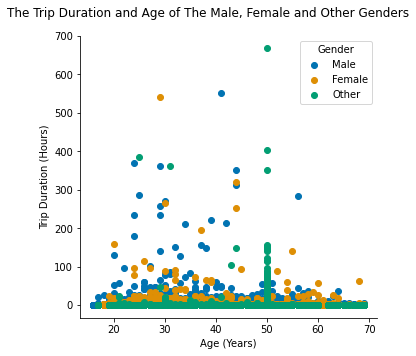

In [5]:
#convert seconds to hours
df.trip_duration=df['trip_duration'].div(3600).round(3)
#facetgrid with hue as gender
g=sb.FacetGrid(data=df,hue='gender',height=5,palette='colorblind')
#facetgrid with scatterplot of Age against trip duration
g.map(plt.scatter, 'age','trip_duration')
#figure legend
plt.legend(['Male','Female','Other'], title='Gender')
g.fig.subplots_adjust(top=0.9)
#axis labels
plt.xlabel('Age (Years)')
plt.ylabel('Trip Duration (Hours)')
#figure title
g.fig.suptitle('The Trip Duration and Age of The Male, Female and Other Genders');

In [17]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slides.ipynb --to slides --post serve --no-input --no-prompt